# Анализ коммерческой деятельности  сервиса аренды самокатов GoFast

[1. Описание проекта](#описание)  
[2. Загрузка данных и подготовка их к анализу](#загрузка)  
[3. Предварительная обработка данных](#обработка)  
[4. Исследовательский анализ данных](#анализ)   
[4.1 Определим частоту встречаемости городов](#город)  
[4.2 Оценим соотношение пользователей с подпиской и без подписки](#пользователи)  
[4.3 Рассмотрим возраст пользователей](#возраст)  
[4.4 Рассмотрим расстояние, которое пользователь преодолевает за одну поездку](#расстояние)  
[4.5 Рассмотрим продолжительность поездок](#продолжительность)  
[4.6 Создадим новые датафреймы](#новые)  
[4.6.1 Объединим все датафреймы в один](#объединим)  
[4.6.2 Создадим два дополнительных датафрейма - с пользователями с подпиской и без подписки](#создадим)  
[4.7 Визуализируем данные о расстоянии поездок для пользователей обеих категорий](#орасстоянии)  
[4.8 Визуализируем данные о длительности поездок для пользователей обеих категорий](#одлительности)  
[4.9 Рассчитаем помесячную выручку с каждого пользователя](#выручка)  
[5. Проверим гипотезы](#гипотезы)  
[5.1 Тратят ли пользователи с подпиской больше времени на поездки?](#первая)  
[5.2 Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?](#вторая)  
[5.3 Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?](#третья)  
[5.4  Гипотеза о снижении количества обращений клиентов после обновления сервера](#четвертая)  
[6. Распределения](#распределения)  
[6.1 Определим частоту встречаемости городов](#1задача)  
[6.2 Определим частоту встречаемости городов](#2задача)  
[7. Выводы](#выводы)  

<a id="описание"></a>
## Описание проекта  

В нашем распоряжении три датасета с информацией о деятельности сервиса аренды самокатов `GoFast` о пользователях сервиса, их поездках и подписках.  

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
- без подписки:
    - абонентская плата отсутствует;
    - стоимость одной минуты поездки — 8 рублей;
    - стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra:
    - абонентская плата — 199 рублей в месяц;
    - стоимость одной минуты поездки — 6 рублей;
    - стоимость старта — бесплатно.  
    
**Цели исследования** — проанализировать полученные данные, выдвинуть и проверить гипотезы, которые могут помочь бизнесу вырасти.


**План проведения исследования:**

- загрузить и изучить данные,
- выполнить их предварительную обработку,
- провести исследовательский анализ данных,
- провести расчеты экономических показателей (выручки),
- проверить гипотезы, направленные на оптимизацию бизнеса:
    - тратят ли пользователи с подпиской больше времени на поездки?
    - можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
    - будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?
- решить две задачи на распределения для отдела маркетинга.

<a id="загрузка"></a>
## Загрузка данных и подготовка их к анализу  

Загрузм данные о пользователях, поездках и подписках из CSV-файлов в переменные.

Пути к файлам:

- пользователи: [ссылка](https://drive.google.com/file/d/1UNyclMhUcLG3FmZDGdhPWtU-R7woG2ps/view?usp=sharing),
- поездки: [ссылка](https://drive.google.com/file/d/1AqtYV3GzZaXXWlX1lijpqzPpyROvBtF9/view?usp=sharing),
- подписки: [ссылка](https://drive.google.com/file/d/1qQ9V8Xs6pl4joildl_12hV8x030Ttgzm/view?usp=sharing).   

Изучим данные и выполним предобработку. Рассмотрим наличие в данных пропусков и дубликатов. Убедимся, что типы данных во всех колонках соответствуют сохранённым в них значениям.

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import scipy.stats as st
from scipy.stats import binom
from scipy.stats import norm
from math import factorial
from math import sqrt

import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [34]:
! gdown --id 1UNyclMhUcLG3FmZDGdhPWtU-R7woG2ps

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1UNyclMhUcLG3FmZDGdhPWtU-R7woG2ps
To: /content/users_go.csv
100% 67.2k/67.2k [00:00<00:00, 52.9MB/s]


In [35]:
! gdown --id 1AqtYV3GzZaXXWlX1lijpqzPpyROvBtF9

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1AqtYV3GzZaXXWlX1lijpqzPpyROvBtF9
To: /content/rides_go.csv
100% 940k/940k [00:00<00:00, 30.0MB/s]


In [36]:
! gdown --id 1qQ9V8Xs6pl4joildl_12hV8x030Ttgzm

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1qQ9V8Xs6pl4joildl_12hV8x030Ttgzm
To: /content/subscriptions_go.csv
100% 91.0/91.0 [00:00<00:00, 397kB/s]


In [37]:
# Отформатируем отображение вещественных чисел - оставим 2 знака после точки.
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [38]:
try:
    users = pd.read_csv('/content/users_go.csv')

except FileNotFoundError:
    print("Файл не найден")
except pd.errors.EmptyDataError:
    print("Файл пустой или не содержит данных")
except pd.errors.ParserError:
    print("Ошибка при чтении файла")

In [39]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


В датасете `users` 5 колонок и 1565 строк.  
Пропусков нет. Типы данных сомнений не вызывают.  

In [40]:
users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


Проверим наличие строк-дубликатов.

In [41]:
print('Явных строк дубликатов:', users.duplicated().sum())

Явных строк дубликатов: 31


Посмотрим на эти строки.

In [42]:
users[users.duplicated()]

,user_id,name,age,city,subscription_type
1534,293,Агата,26,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
1536,909,Константин,20,Екатеринбург,free
1537,403,Полина,19,Сочи,ultra
1538,908,Рустам,30,Тюмень,free
1539,43,Стефания,22,Омск,ultra
1540,127,Павел,25,Пятигорск,ultra
1541,659,Злата,27,Ростов-на-Дону,ultra
1542,204,Руслан,30,Пятигорск,ultra
1543,153,Герман,23,Москва,ultra


Избавимся от этих строк-дубликатов

In [43]:
users = users.drop_duplicates()
print('В датафрейме осталось', users.shape[0], 'строки после удаления строк-дубликатов')

В датафрейме осталось 1534 строки после удаления строк-дубликатов


Рассмотрим диапазон возрастов и поищем, нет ли там подозрительных значений.

In [44]:
users['age'].describe()

count   1534.00
mean      24.90
std        4.57
min       12.00
25%       22.00
50%       25.00
75%       28.00
max       43.00
Name: age, dtype: float64

Возраст клиентов варьируется от 12 до 43 лет.  
Посмотрим, много ли у нас клиентов-детей до 16 лет?

In [45]:
df_kids = users[users['age'] <= 16]
df_kids['age'].value_counts()

16    19
15    13
14     9
13     8
12     4
Name: age, dtype: int64

У нас 4 клиента 12-летнего возраста. Также есть 13- и 14-летние клиенты.  
Можем сделать умозаключение, что регистрироваться в нашем сервисе можно начиная с этого возраста.  
В таком случае аномалий здесь нет.  

Проверим колонки с категориальными перменными.

In [46]:
users['name'].sort_values().unique()

array(['Агата', 'Аделина', 'Адель', 'Айдар', 'Александр', 'Александра',
       'Алексей', 'Алина', 'Алиса', 'Алия', 'Алла', 'Альберт', 'Альбина',
       'Алёна', 'Амалия', 'Амина', 'Амир', 'Анастасия', 'Анатолий',
       'Ангелина', 'Андрей', 'Анжелика', 'Анна', 'Антон', 'Антонина',
       'Ариана', 'Арина', 'Арсен', 'Арсений', 'Артемий', 'Артур', 'Артём',
       'Богдан', 'Борис', 'Вадим', 'Валентина', 'Валерий', 'Валерия',
       'Варвара', 'Василий', 'Василина', 'Василиса', 'Вера', 'Вероника',
       'Виктор', 'Виктория', 'Виолетта', 'Виталий', 'Виталина', 'Влад',
       'Влада', 'Владимир', 'Владислав', 'Владислава', 'Всеволод',
       'Вячеслав', 'Галина', 'Георгий', 'Герман', 'Глеб', 'Гордей',
       'Григорий', 'Давид', 'Дамир', 'Даниил', 'Данил', 'Данила',
       'Даниэль', 'Дарина', 'Дарья', 'Демид', 'Денис', 'Диана', 'Дмитрий',
       'Ева', 'Евгений', 'Евгения', 'Егор', 'Екатерина', 'Елена',
       'Елизавета', 'Елисей', 'Есения', 'Жанна', 'Зарина', 'Захар',
       'Злата', 

Есть имя "Наташа". Потенциально, это неявный дубликат. Посмотрим, сколько встречается таких имен.

In [47]:
len(users[users['name'] == 'Наташа'])

11

11 пользователей идентифицируют себя как "Наташа". Можно было бы расценить это как неявный дубликат и переименовать их в Наталью, но у нас есть два варианта написания этого имени - Наталья и Наталия. Не будем гадать и оставим имя Наташа как есть.

In [48]:
users['city'].sort_values().unique()

array(['Екатеринбург', 'Краснодар', 'Москва', 'Омск', 'Пятигорск',
       'Ростов-на-Дону', 'Сочи', 'Тюмень'], dtype=object)

In [49]:
users['subscription_type'].unique()

array(['ultra', 'free'], dtype=object)

В остальных колонках нет неявных дубликатов и подозрительных значений.  

Перейдем к следующему датасету.  
У колонки с датой измениv тип данных на "datetime".

In [50]:
try:
  rides = pd.read_csv('/content/rides_go.csv', parse_dates=['date'])

except FileNotFoundError:
    print("Файл не найден")
except pd.errors.EmptyDataError:
    print("Файл пустой или не содержит данных")
except pd.errors.ParserError:
    print("Ошибка при чтении файла")

In [51]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


In [52]:
rides.head()

,user_id,distance,duration,date
0,1,4409.92,25.60,2021-01-01
1,1,2617.59,15.82,2021-01-18
2,1,754.16,6.23,2021-04-20
3,1,2694.78,18.51,2021-08-11
4,1,4028.69,26.27,2021-08-28


В этом датафрейме 4 колонки и 18068 строк.  
Пропусков нет.  


Для упрощения дальнейших расчетов добавим в этот датафрейм колонку с номером месяца.

In [53]:
rides['month'] = rides['date'].dt.month
rides.head()

,user_id,distance,duration,date,month
0,1,4409.92,25.60,2021-01-01,1
1,1,2617.59,15.82,2021-01-18,1
2,1,754.16,6.23,2021-04-20,4
3,1,2694.78,18.51,2021-08-11,8
4,1,4028.69,26.27,2021-08-28,8


In [54]:
print('Начальная дата анализируемого периода:', rides['date'].min())
print('Конечная дата анализируемого периода:', rides['date'].max())

Начальная дата анализируемого периода: 2021-01-01 00:00:00
Конечная дата анализируемого периода: 2021-12-30 00:00:00


In [55]:
print('Явных строк дубликатов:', rides.duplicated().sum())

Явных строк дубликатов: 0


In [56]:
rides.describe()

,user_id,distance,duration,month
count,18068.00,18068.00,18068.00,18068.00
mean,842.87,3070.66,17.81,6.49
std,434.73,1116.83,6.09,3.44
min,1.00,0.86,0.50,1.00
25%,487.00,2543.23,13.60,4.00
50%,889.00,3133.61,17.68,6.00
75%,1213.25,3776.22,21.72,9.00
max,1534.00,7211.01,40.82,12.00


Невозможных значений расстояния и длительности поездки на первый взгляд не видим.  
Рассчитаем скорости передвижения на электросамокатах.

In [57]:
rides['speed'] = (rides['distance'] / 1000) / (rides['duration'] / 60)
overspeed = rides[rides['speed'] > 40]
overspeed

,user_id,distance,duration,date,month,speed
6531,701,4196.45,0.50,2021-08-31,8,503.57
6570,704,4830.82,0.50,2021-10-14,10,579.70
6680,712,4684.00,0.50,2021-03-04,3,562.08
6695,713,5215.64,0.50,2021-02-25,2,625.88
6768,718,5197.44,0.50,2021-02-11,2,623.69
...,...,...,...,...,...,...
17004,1460,5531.34,0.50,2021-01-19,1,663.76
17242,1477,6724.93,0.50,2021-01-12,1,806.99
17314,1483,4445.48,0.50,2021-03-06,3,533.46
17505,1496,5722.55,0.50,2021-02-14,2,686.71


In [58]:
overspeed['speed'].describe()

count    95.00
mean    613.58
std      78.99
min     483.64
25%     553.38
50%     606.33
75%     658.62
max     865.32
Name: speed, dtype: float64

Мы видим, что у нас есть 95 строк с аномально высокой скоростью - от 483 км/ч и выше.  
Разберемся с этими аномалиями при проведении предварительной обработки в следующем разделе.

Рассмотрим третий датафрейм.

In [59]:
try:
  subs = pd.read_csv('/content/subscriptions_go.csv')

except FileNotFoundError:
    print("Файл не найден")
except pd.errors.EmptyDataError:
    print("Файл пустой или не содержит данных")
except pd.errors.ParserError:
    print("Ошибка при чтении файла")

In [60]:
subs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


In [61]:
subs

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


В датасете 4 колонки и 2 строки.  
Без аномалий.

**Резюме подраздела.**  

Мы загрузили, прочитали и провели предобработку имеющихся датасетов:

- изменили тип данных колонки с датами и привели его к "datetime",
- удалили 31 строку-дубликат,
- создали новый столбец с номером месяца на основе столбца "date".

<a id="обработка"></a>
## Предварительная обработка данных  

Внимательнее рассмотрим строки с аномальными значениями скорости в датафрейме `rides`.


In [62]:
overspeed['speed'].describe()

count    95.00
mean    613.58
std      78.99
min     483.64
25%     553.38
50%     606.33
75%     658.62
max     865.32
Name: speed, dtype: float64

In [63]:
overspeed['duration'].value_counts()

0.50    95
Name: duration, dtype: int64

In [64]:
overspeed['distance'].describe()

count     95.00
mean    5113.18
std      658.25
min     4030.31
25%     4611.51
50%     5052.77
75%     5488.46
max     7211.01
Name: distance, dtype: float64

Во всех 95 строках разные расстояния от 4 до 7,2 км., но одно и то же время - 0,5 мин.  
Можем сделать вывод, что здесь указано некорректное время.  
Чтобы не искажать результат вычисления выручки, не будем удалять эти строки. Заменим аномально низкие значения времени на медианные для соответствующих диапазонов расстояний.  


In [65]:
# сгруппируем расстояния в отдельной колонке
rides['distance_group'] = pd.cut(rides['distance'],
bins = [0, 4000, 5000, 6000, 8000],
labels = ['<4', '4-5', '5-6', '6-7']
)

In [66]:
rides.head()

,user_id,distance,duration,date,month,speed,distance_group
0,1,4409.92,25.60,2021-01-01,1,10.34,4-5
1,1,2617.59,15.82,2021-01-18,1,9.93,<4
2,1,754.16,6.23,2021-04-20,4,7.26,<4
3,1,2694.78,18.51,2021-08-11,8,8.73,<4
4,1,4028.69,26.27,2021-08-28,8,9.20,4-5


In [67]:
# составим список индексов строк с некорректным временем поездки
index_list = overspeed.index.tolist()

# удалим значения некорректного времени поездки в этих строках из df
rides.loc[index_list, 'duration'] = None

In [68]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         18068 non-null  int64         
 1   distance        18068 non-null  float64       
 2   duration        17973 non-null  float64       
 3   date            18068 non-null  datetime64[ns]
 4   month           18068 non-null  int64         
 5   speed           18068 non-null  float64       
 6   distance_group  18068 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(3), int64(2)
memory usage: 864.9 KB


В колонке `duration` появились пропущенные значения.  
Заполним эти пропуски медианным временем для каждого из диапазонов расстояний.

In [69]:
rides['duration'] = rides.groupby('distance_group')['duration'].apply(lambda x: x.fillna(x.median()))

In [70]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         18068 non-null  int64         
 1   distance        18068 non-null  float64       
 2   duration        18068 non-null  float64       
 3   date            18068 non-null  datetime64[ns]
 4   month           18068 non-null  int64         
 5   speed           18068 non-null  float64       
 6   distance_group  18068 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(3), int64(2)
memory usage: 864.9 KB


Пропусков нет.  
Посмотрим на строки датафрейма `rides`, в которых бло некорректное время поездки.

In [71]:
rides.loc[index_list,]

,user_id,distance,duration,date,month,speed,distance_group
6531,701,4196.45,21.57,2021-08-31,8,503.57,4-5
6570,704,4830.82,21.57,2021-10-14,10,579.70,4-5
6680,712,4684.00,21.57,2021-03-04,3,562.08,4-5
6695,713,5215.64,24.04,2021-02-25,2,625.88,5-6
6768,718,5197.44,24.04,2021-02-11,2,623.69,5-6
...,...,...,...,...,...,...,...
17004,1460,5531.34,24.04,2021-01-19,1,663.76,5-6
17242,1477,6724.93,26.08,2021-01-12,1,806.99,6-7
17314,1483,4445.48,21.57,2021-03-06,3,533.46,4-5
17505,1496,5722.55,24.04,2021-02-14,2,686.71,5-6


Тперь время в колонке `duration`выглядит правдоподобным.  
Зново пересчитаем скорость.

In [72]:
rides['speed'] = (rides['distance'] / 1000) / (rides['duration'] / 60)
rides['speed'].describe()

count   18068.00
mean       10.63
std         3.96
min         0.01
25%         8.13
50%        10.25
75%        12.90
max        25.39
Name: speed, dtype: float64

Сейчас все в порядке - максимальная скорость не превышает 26 км/ч.

**Резюме подраздела:**  
Мы исследовали и устранили аномальные значения времени поездки, заменив их медианноми значениями для соответствующих диапазонов расстояния поездки.

<a id="анализ"></a>
## Исследовательский анализ данных

<a id="город"></a>
### Определим частоту встречаемости городов

In [73]:
cities = users.groupby('city')['city'].count().reset_index(name='count').sort_values(by='count', ascending=False)

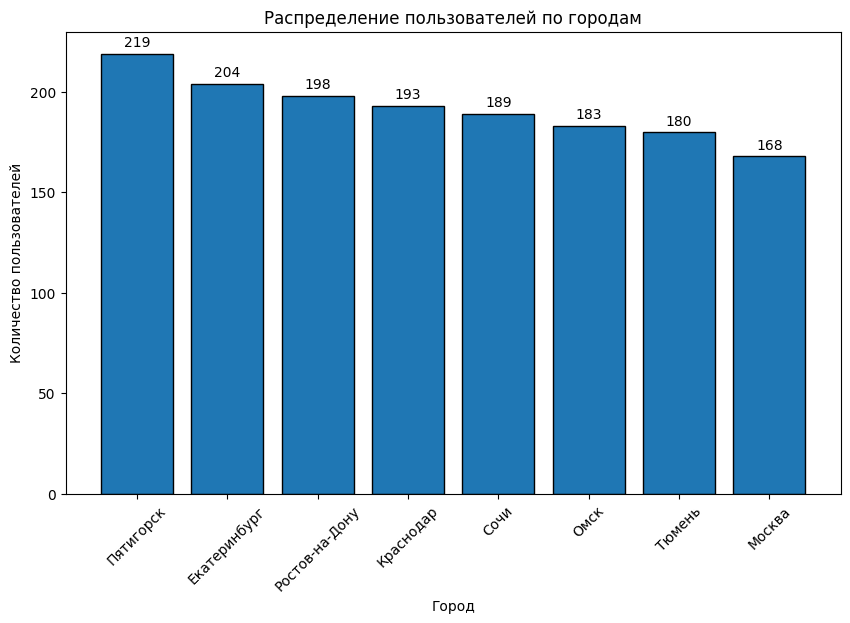

In [74]:
plt.figure(figsize=(10, 6))

bars = plt.bar(cities['city'], cities['count'], edgecolor='black')

plt.xlabel('Город')
plt.ylabel('Количество пользователей')
plt.title('Распределение пользователей по городам')

for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points',
                 ha='center', va='bottom')

plt.xticks(rotation=45)

plt.show()

Наибольшая частота встречаемости - у Пятигорска.  
Наименьшая - у Москвы.


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Да, похоже на то.</div>

<a id="пользователи"></a>
### Оценим соотношение пользователей с подпиской и без подписки

In [75]:
sub_types = users.groupby('subscription_type')['user_id'].count().reset_index()
sub_types = sub_types.rename(columns={'user_id': 'count'})
sub_types['share'] = round(sub_types['count'] / sub_types['count'].sum() * 100, 1)
sub_types

,subscription_type,count,share
0,free,835,54.40
1,ultra,699,45.60


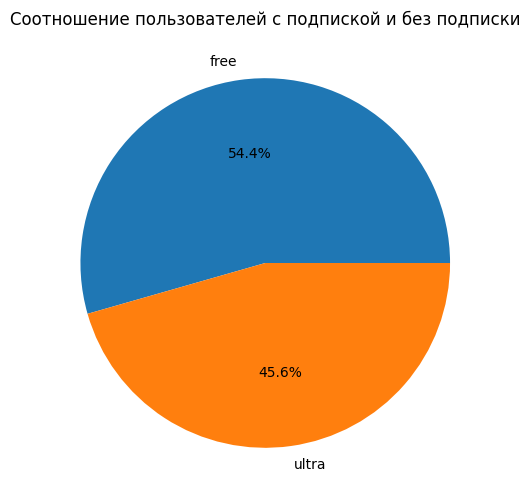

In [76]:
plt.figure(figsize=(10,6))

plt.pie(sub_types['count'], labels=sub_types['subscription_type'], autopct='%1.1f%%')
plt.title('Соотношение пользователей с подпиской и без подписки')

plt.show()

Пользователей без подписки больше, чем пользователей с подпиской (54,4% vs. 45,6%).

<a id="возраст"></a>
### Рассмотрим возраст пользователей

In [77]:
age = users.groupby('age')['user_id'].count().reset_index()

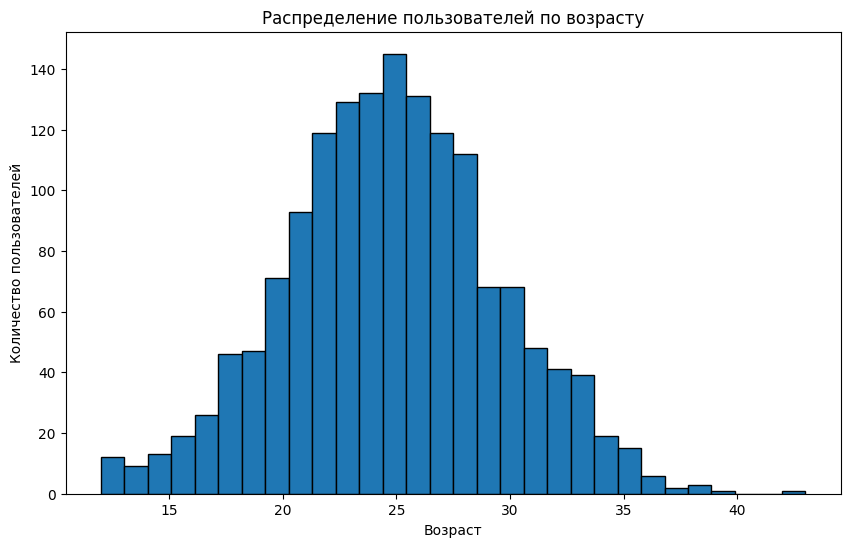

In [78]:
plt.figure(figsize=(10,6))

plt.hist(users['age'], bins=30, edgecolor='black')

plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.title('Распределение пользователей по возрасту')

plt.show()

Большинство пользователей - в возрасте около 25 лет.

<a id="расстояние"></a>
### Рассмотрим расстояние, которое пользователь преодолевает за одну поездку

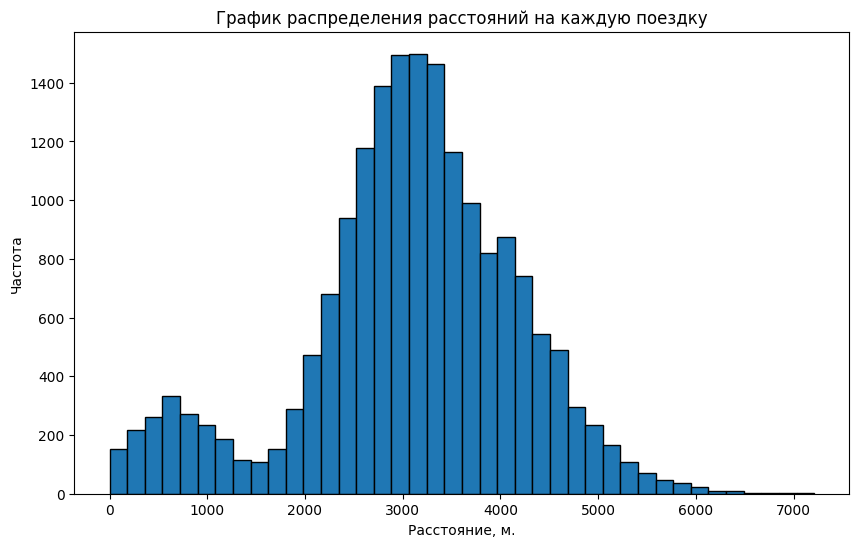

In [79]:
plt.figure(figsize=(10,6))

plt.hist(rides['distance'], bins=40, edgecolor='black')

plt.xlabel('Расстояние, м.')
plt.ylabel('Частота')
plt.title('График распределения расстояний на каждую поездку')

plt.show()

Чаще всего поездки совершаются на расстояние около 3 км.

<a id="продолжительность"></a>
### Рассмотрим продолжительность поездок

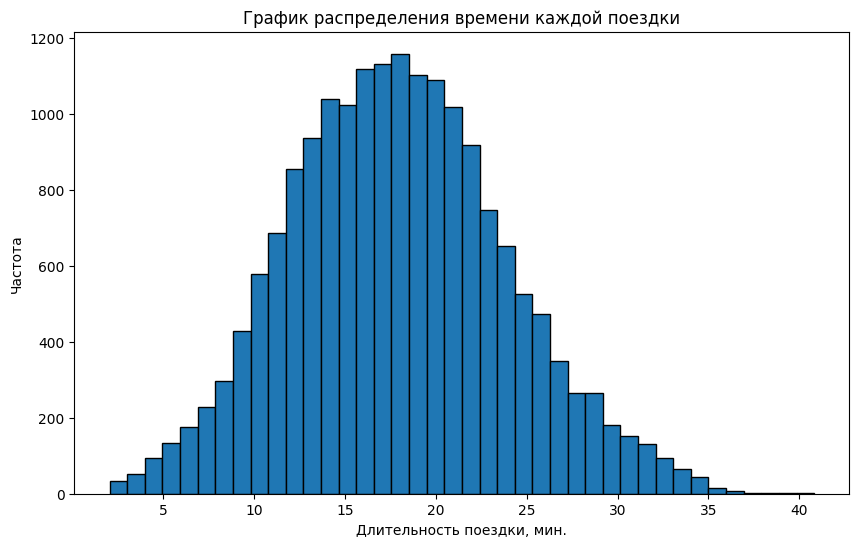

In [80]:
plt.figure(figsize=(10,6))

plt.hist(rides['duration'], bins=40, edgecolor='black')

plt.xlabel('Длительность поездки, мин.')
plt.ylabel('Частота')
plt.title('График распределения времени каждой поездки')

plt.show()

Чаще всего поездки продолжаются около 18 минут.  

<a id="новые"></a>
### Создадим новые датафреймы
<a id="объединим"></a>
#### Объединим все датафреймы в один

In [81]:
print('Количество строк датафрейма users:', users.shape[0])
print('Количество строк датафрейма rides:', rides.shape[0])
print('Количество строк датафрейма subs:', subs.shape[0])

Количество строк датафрейма users: 1534
Количество строк датафрейма rides: 18068
Количество строк датафрейма subs: 2


In [82]:
df = users.merge(rides, on='user_id')
df = df.merge(subs, on='subscription_type')
df.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,speed,distance_group,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,25.60,2021-01-01,1,10.34,4-5,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,15.82,2021-01-18,1,9.93,<4,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,6.23,2021-04-20,4,7.26,<4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,18.51,2021-08-11,8,8.73,<4,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,26.27,2021-08-28,8,9.20,4-5,6,0,199


In [83]:
print('Количество строк итогового датафрейма df:', df.shape[0])

Количество строк итогового датафрейма df: 18068


In [84]:
df.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
speed                0
distance_group       0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Максимальное количество строк начального датафрейма совпадает с количеством строк итогового датафрейма. Пропусков нет.  
Мы провели успешное объединение датафреймаов.

<a id="создадим"></a>
#### Создадим два дополнительных датафрейма - с пользователями с подпиской и без подписки

In [85]:
df_ultra = df[df['subscription_type'] == 'ultra']
df_ultra.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,speed,distance_group,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,25.60,2021-01-01,1,10.34,4-5,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,15.82,2021-01-18,1,9.93,<4,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,6.23,2021-04-20,4,7.26,<4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,18.51,2021-08-11,8,8.73,<4,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,26.27,2021-08-28,8,9.20,4-5,6,0,199


In [86]:
df_free = df[df['subscription_type'] == 'free']
df_free.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,speed,distance_group,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.69,14.94,2021-01-02,1,10.10,<4,8,50,0
6501,700,Айдар,22,Омск,free,846.93,16.23,2021-02-01,2,3.13,<4,8,50,0
6502,700,Айдар,22,Омск,free,4004.43,20.02,2021-02-04,2,12.00,4-5,8,50,0
6503,700,Айдар,22,Омск,free,1205.91,9.78,2021-02-10,2,7.40,<4,8,50,0
6504,700,Айдар,22,Омск,free,3047.38,17.43,2021-02-14,2,10.49,<4,8,50,0


<a id="орасстоянии"></a>
### Визуализируем данные о расстоянии поездок для пользователей обеих категорий

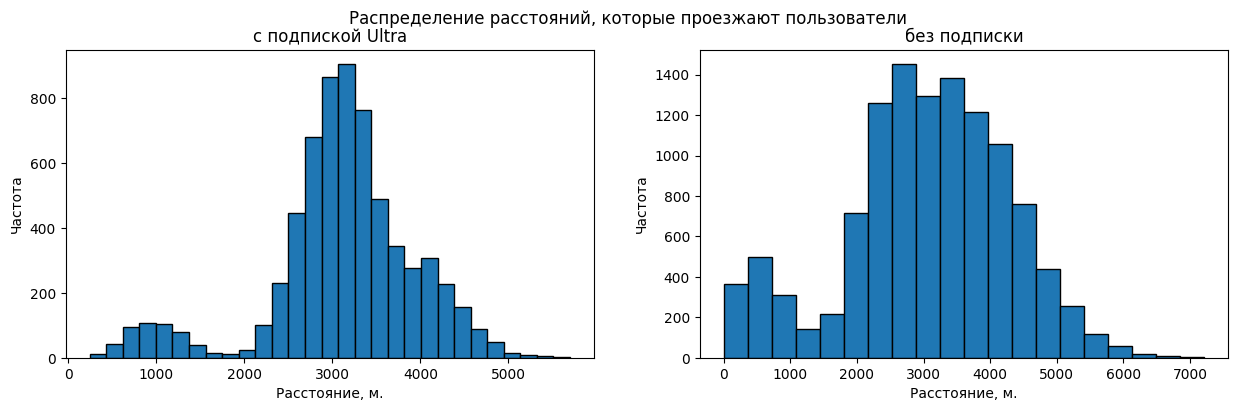

In [87]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4))

axs[0].hist(df_ultra['distance'], bins=29, edgecolor='black')
axs[0].set_title('с подпиской Ultra')

axs[1].hist(df_free['distance'], bins=20, edgecolor='black')
axs[1].set_title('без подписки')

plt.suptitle('Распределение расстояний, которые проезжают пользователи')

axs[0].set_xlabel('Расстояние, м.')
axs[0].set_ylabel('Частота')
axs[1].set_xlabel('Расстояние, м.')
axs[1].set_ylabel('Частота')

plt.show()

Наиболее частое расстояние, которое проезжают за одну поездку пользователи с подпиской Ultra - немного более 3 км.  
У пользователей без подписки наиболее частое расстояние поездки - до 3 км.

<a id="одлительности"></a>
### Визуализируем данные о длительности поездок для пользователей обеих категорий

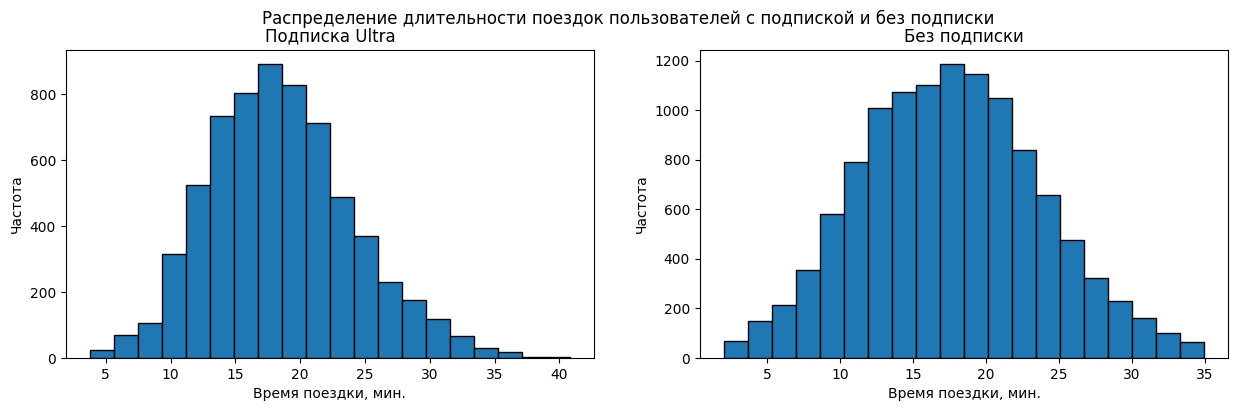

In [88]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4))

axs[0].hist(df_ultra['duration'], bins=20, edgecolor='black')
axs[0].set_title('Подписка Ultra')

axs[1].hist(df_free['duration'], bins=20, edgecolor='black')
axs[1].set_title('Без подписки')

plt.suptitle('Распределение длительности поездок пользователей с подпиской и без подписки')

axs[0].set_xlabel('Время поездки, мин.')
axs[0].set_ylabel('Частота')
axs[1].set_xlabel('Время поездки, мин.')
axs[1].set_ylabel('Частота')

plt.show()

Наиболее частые продолжительности поездок у пользоватлей с подпиской и без подписки во многом совпадают. Наиболее частое время поездки - около 18 минут.

<a id="выручка"></a>
### Рассчитаем помесячную выручку с каждого пользователя

In [89]:
# округлим значения вверх до ближайшего целого числа
df['duration'] = np.ceil(df['duration'])

In [90]:
# создадим датафрейм с нужными нам для расяетов колонками.
df_revenue = df.groupby(['user_id', 'month']).agg({'distance': 'sum', 'name': 'count', 'duration': 'sum', \
                                                   'minute_price': 'mean', 'start_ride_price': 'mean', \
                                                   'subscription_fee': 'mean'}).reset_index()

df_revenue = df_revenue.rename(columns={'name': 'count'})

# рассчитаем выручку
df_revenue['revenue'] = df_revenue['start_ride_price'] * df_revenue['count'] + \
                        df_revenue['minute_price'] * df_revenue['duration'] + \
                        df_revenue['subscription_fee']

df_revenue.head()

,user_id,month,distance,count,duration,minute_price,start_ride_price,subscription_fee,revenue
0,1,1,7027.51,2,42.00,6.00,0.00,199.00,451.00
1,1,4,754.16,1,7.00,6.00,0.00,199.00,241.00
2,1,8,6723.47,2,46.00,6.00,0.00,199.00,475.00
3,1,10,5809.91,2,32.00,6.00,0.00,199.00,391.00
4,1,11,7003.50,3,56.00,6.00,0.00,199.00,535.00


In [91]:
df_revenue.isna().sum()

user_id             0
month               0
distance            0
count               0
duration            0
minute_price        0
start_ride_price    0
subscription_fee    0
revenue             0
dtype: int64

Пропусков нет.

In [92]:
print('Средняя месячная выручка с пользоватлея:', df_revenue['revenue'].mean().round(), 'руб.')

Средняя месячная выручка с пользоватлея: 344.0 руб.


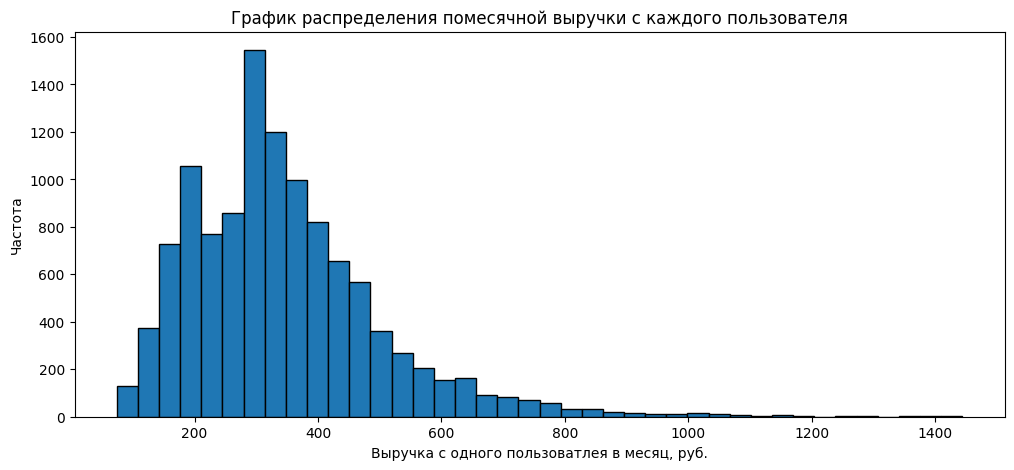

In [93]:
plt.figure(figsize=(12,5))

plt.hist(df_revenue['revenue'], bins=40, edgecolor='black')

plt.xlabel('Выручка с одного пользоватлея в месяц, руб.')
plt.ylabel('Частота')
plt.title('График распределения помесячной выручки с каждого пользователя')

plt.show()

Большинство пользователей тратит на наш сервис в среднем 341 руб. в месяц.

**Резюме подраздела.**  
- Больше всего пользователей - в Пятигорске (219 пользователей),
- Меньше всего пользователей - в Москве (168)
- Пользователей без подписки - 835 (или 54,4% от их общего количества),
- Пользователей с подпиской - 699 (или 45,6%),
- Наиболее частый возраст пользователя - 25 лет,
- Поездки совершаются преимущественно на 3 - 3,5 км.
- Длительность большинства поездок - около 18 минут.
- Наиболее частая ежемесячная выручка с одного пользователя - 341 руб.

<a id="гипотезы"></a>
## Проверим гипотезы  

<a id="первая"></a>
### Тратят ли пользователи с подпиской больше времени на поездки?  

**Нулевая гипотеза:** Пользователи с подпиской тратят столько же времени на поездки, как и пользователи без подписки.  
**Альтернативная гипотеза:** Пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки.  

Проверим одностороннюю гипотезу о равенстве средних двух генеральных совокупностей.

In [94]:
alpha = 0.05

first_group = df_ultra['duration']
second_group = df_free['duration']

results = st.ttest_ind(first_group, second_group, alternative='greater')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 7.711893776386618e-26
Отвергаем нулевую гипотезу


Полученное значение p-value меньше заданного уровня значимости alpha, поэтому мы можем отвергнуть нулевую гипотезу.  
Есть основания утверждать, что пользователи с подпиской тратят больше времени на поездки,чем пользователи без подписки.

<a id="вторая"></a>
### Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?  

**Нулевая гипотеза:** Среднее расстояние поездки равно 3130 метров.   
**Альтернативная гипотеза:** Среднее расстояние поездки больше 3130 метров.   

Проверим одностороннюю гипотезу.

In [95]:
rides = df_ultra['distance']
avg_ride = 3130

alpha = 0.05

results = st.ttest_1samp(rides, avg_ride, alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 0.9195368847849785
Не отвергаем нулевую гипотезу


Полученное значение p-value больше заданного уровня значимости alpha, поэтому можем принять нулевую гипотезу.  
Мы можем сказать, что среднее расстояние, которое проезжают пользователи с подпиской Ultra за одну поездку, не превышает 3130 м.

<a id="третья"></a>
### Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?  

**Нулевая гипотеза:** Помесячная выручка от пользователей с подпиской равна помесячной выручке от пользователей без подписки.  
**Альтернативная гипотеза:** Помесячная выручка от пользователей с подпиской больше помесячной выручке от пользователей без подписки.

Создадим два датафрейма - с ежемесячной выручкой от пользоватлелей с подпиской и от пользоватлелей без подписки.

In [96]:
monthly_ultra = df_revenue[df_revenue['subscription_fee'] == 199]
monthly_free = df_revenue[df_revenue['subscription_fee'] == 0]

Затем проверим одностороннюю гипотезу о равенстве средних двух генеральных совокупностей.

In [97]:
alpha = 0.05

first_group = monthly_ultra['revenue']
second_group = monthly_free['revenue']

results = st.ttest_ind(first_group, second_group, alternative='greater')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 4.497754370729069e-27
Отвергаем нулевую гипотезу


Полученное значение p-value меньше заданного уровня значимости alpha, поэтому мы можем отвергнуть нулевую гипотезу.  
Мы можем утверждать, что помесячная выручка от пользователей с подпиской больше помесячной выручке от пользователей без подписки.

**Резюме подраздела:**  

Мы проверили гипотезы и пришли к выводу, что у нас есть основания утверждать:
- пользователи с подпиской тратят больше времени на поездки,чем пользователи без подписки,
- среднее расстояние, которое проезжают пользователи с подпиской Ultra за одну поездку, не превышает 3130 м,
- помесячная выручка от пользователей с подпиской больше помесячной выручке от пользователей без подписки.

<a id="распределения"></a>
## Распределения
<a id="1задача"></a>
### 1 задача.  
Отделу маркетинга нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж.
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10% пользователей.  

Требуется:
- выяснить, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5%,
- подобрать параметры распределения, описывающего эту ситуацию,
- построить график распределения,
- сформулировать ответ на вопрос о количестве промокодов.

Минимальное количество промокодов: 1161


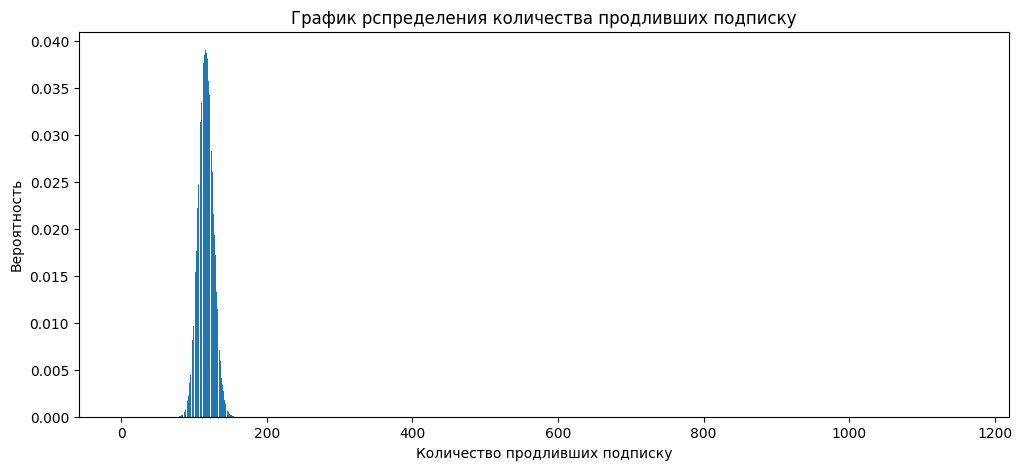

In [99]:
p = 0.1  # вероятность продления подписки
n = 100  # винимальное количество клиентов, которые должны продлить подписку
level = 0.95  # степень вероятности продления подписки

# находим минимальное количество промокодов
k = 0
while True:
    k += 1
    distr = st.binom(k, p)
    probability = 1 - distr.cdf(n - 1)
    if probability >= level:
        break

print("Минимальное количество промокодов:", k)

# строим график распределения
x = np.arange(0, k + 1)
y = distr.pmf(x)

plt.figure(figsize=(12,5))
plt.bar(x, y)
plt.xlabel("Количество продливших подписку")
plt.ylabel("Вероятность")
plt.title("График рспределения количества продливших подписку")
plt.show()


Чтобы с вероятностью 95% подписку продлили 100 клиентов, нужно разослать как минимуи 1161 промокод.

<a id="2задача"></a>
### 2 задача.   

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40% получивших клиентов. Отдел планирует разослать 1 млн уведомлений.  
Требуется с помощью аппроксимации построить примерный график распределения и оценить вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

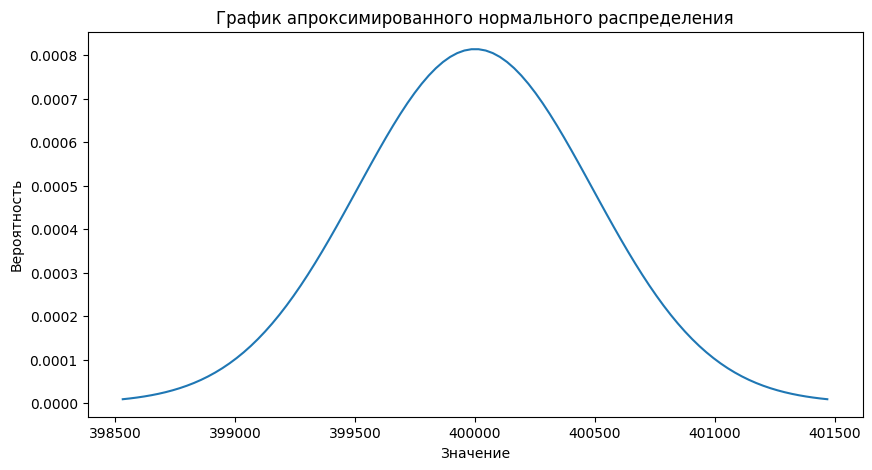

Вероятность: 0.154


In [100]:
# задаём параметры биномиального распределения
n = 1000000
p = 0.4

# зададим мат.ожидание и ст.отклонение нормального распределения равными
# мат.ожиданию и ст.отклонению биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))

# задаём нормальное распределение
distr = st.norm(mu, sigma)

# рисуем график нормального распределения:
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = st.norm.pdf(x, mu, sigma)

plt.figure(figsize=(10,5))
plt.plot(x, y)
plt.xlabel('Значение')
plt.ylabel('Вероятность')
plt.title('График апроксимированного нормального распределения')
plt.show()

# считаем вероятность хвоста слева от 399,5 тысяч
result = distr.cdf(399500)
print('Вероятность:', round(result, 3))

Вероятность того, что push-уведомления откроют не более 399,5 тыс. пользователей, составляет 15,4%.

<a id="выводы"></a>
## Выводы

1. Топ-3 города по количеству зарегистрированных пользователей нашего сервиса:
    1. Пятигорск - 219 пользователей,
    2. Екатеринбург - 204 пользователя,
    3. Ростов-на-Дону - 198 пользователей.
2. Меньше всего пользователей - в Москве (168).
3. Количество пользователей в зависимости от подписки:
    1. Пользователей без подписки - 835 (или 54,4% от их общего количества),
    2. Пользователей с подпиской - 699 (или 45,6%).
4. Наиболее частый возраст пользователя - 25 лет.
5. Поездки совершаются преимущественно на 3 км.,
6. Длительность большинства поездок - около 18 минут.
7. Большинство пользователей тратит на наш сервис в среднем 341 руб. в месяц.
8. В результате проверки гипотез у нас есть основания утверждать:
    1. Пользователи с подпиской тратят больше времени на поездки,чем пользователи без подписки.
    2. Среднее расстояние, которое проезжают пользователи с подпиской Ultra за одну поездку, не превышает 3130 м.
    3. Помесячная выручка от пользователей с подпиской больше помесячной выручке от пользователей без подписки.
9. В результате решения задач на распределение установили:
    1. Чтобы с вероятностью 95% подписку продлили 100 клиентов, нужно разослать как минимуи 1161 промокод.
    2. Вероятность того, что push-уведомления откроют не более 399,5 тыс. пользователей, составляет 15,4%.